## Лабораторная рабоота 6 Курбанов Джурат AIN-1-21


In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [3]:

#Загрузка и обработка данных для датасета Breast Cancer
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    breast_cancer_df.drop('target', axis=1), breast_cancer_df['target'], test_size=0.2, random_state=42
)

In [4]:
# Обучение модели и оценка качества для датасета Breast Cancer
rf_bc = RandomForestClassifier(random_state=42)
rf_bc.fit(X_train_bc, y_train_bc)
y_pred_bc = rf_bc.predict(X_test_bc)

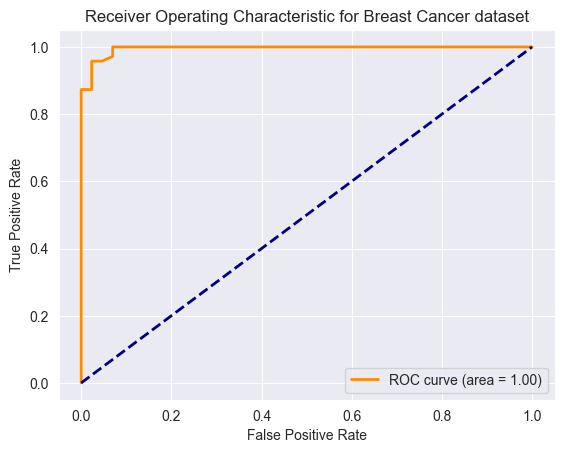

In [5]:
# Визуализация ROC-кривой для Breast Cancer
fpr_bc, tpr_bc, _ = roc_curve(y_test_bc, rf_bc.predict_proba(X_test_bc)[:, 1])
roc_auc_bc = auc(fpr_bc, tpr_bc)
plt.figure()
plt.plot(fpr_bc, tpr_bc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_bc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Breast Cancer dataset')
plt.legend(loc='lower right')
plt.show()

In [6]:
#Логирование результатов для Breast Cancer
logging.info("Accuracy on test set for Breast Cancer dataset: {:.2f}".format(accuracy_score(y_test_bc, y_pred_bc)))
logging.info("Confusion matrix for Breast Cancer dataset:\n{}".format(confusion_matrix(y_test_bc, y_pred_bc)))
logging.info("Classification report for Breast Cancer dataset:\n{}".format(classification_report(y_test_bc, y_pred_bc)))


In [7]:
#  Применение перекрестной проверки для оценки модели на разных подвыборках
cv_scores = cross_val_score(rf_bc, breast_cancer_df.drop('target', axis=1), breast_cancer_df['target'], cv=5)
logging.info("Cross-validation scores for Breast Cancer dataset: {}".format(cv_scores))

In [8]:
# Применение решетчатого поиска для подбора оптимальных гиперпараметров модели
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}
grid_search = GridSearchCV(rf_bc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bc, y_train_bc)
logging.info("Наилучшие параметры для Breast Cancer dataset: {}".format(grid_search.best_params_))
logging.info("Лучший результат для Breast Cancer dataset: {:.2f}".format(grid_search.best_score_))


In [9]:
# Создание новой модели с оптимальными гиперпараметрами
rf_bc_opt = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)

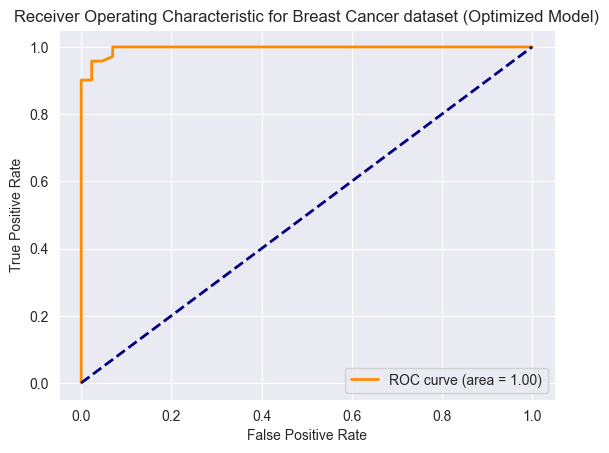

In [10]:
# Обучение новой модели на обучающей выборке
rf_bc_opt.fit(X_train_bc, y_train_bc)
y_pred_bc_opt = rf_bc_opt.predict(X_test_bc)
# Визуализация ROC-кривой для оптимизированной модели Breast Cancer
fpr_bc_opt, tpr_bc_opt, _ = roc_curve(y_test_bc, rf_bc_opt.predict_proba(X_test_bc)[:, 1])
roc_auc_bc_opt = auc(fpr_bc_opt, tpr_bc_opt)

plt.figure()
plt.plot(fpr_bc_opt, tpr_bc_opt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_bc_opt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Breast Cancer dataset (Optimized Model)')
plt.legend(loc='lower right')
plt.show()

In [11]:
#Оценка качества новой модели с помощью метрик
logging.info("Точность набора тестов для набора данных Breast Cancer dataset (optimized): {:.2f}".format(accuracy_score(y_test_bc, y_pred_bc_opt)))
logging.info("Confusion matrix для Breast Cancer dataset (optimized):\n{}".format(confusion_matrix(y_test_bc, y_pred_bc_opt)))
logging.info("Отчет о классификации для Breast Cancer dataset (optimized):\n{}".format(classification_report(y_test_bc, y_pred_bc_opt)))

In [24]:
#3.	Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.
salary_list = [40000, 50000, 60000, 70000, 80000, 900000]
city_list = ['Bishkek', 'Kara-Balta', 'Cholpon-Ata', 'Karakol', 'Tokmok', 'Naryn']
age_list = list(range(30, 66))
vacation_prefer_list = ['Beach holiday', 'Skiing', 'Hiking','Shopping']
transport_prefer_list = ['auto', 'bus', 'plane', 'train']
target_list = ['London', 'Moscow', 'Paris', 'New York', 'Dubai', 'Tokyo']
# Создаем пустой датафрейм с нужными колонками
vacation_df = pd.DataFrame(columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])
# Заполняем датафрейм случайными значениями из списков
for i in range(1000):
  vacation_df.loc[i] = [random.choice(salary_list), random.choice(city_list), random.choice(age_list), random.choice(vacation_prefer_list), random.choice(transport_prefer_list), random.choice(target_list)]
vacation_df['salary'] = vacation_df['salary'].astype(float)
# Просматриваем первые 10 строк датафрейма
vacation_df.head(10)

,salary,city,age,vacation_prefer,transport_prefer,target
0,900000.0,Kara-Balta,61,Beach holiday,auto,Dubai
1,900000.0,Karakol,44,Hiking,auto,Dubai
2,80000.0,Bishkek,43,Skiing,auto,Dubai
3,50000.0,Karakol,59,Shopping,plane,London
4,80000.0,Cholpon-Ata,46,Hiking,plane,New York
5,80000.0,Kara-Balta,59,Hiking,train,London
6,900000.0,Cholpon-Ata,47,Beach holiday,train,New York
7,80000.0,Karakol,48,Beach holiday,plane,New York
8,900000.0,Naryn,31,Shopping,auto,London
9,50000.0,Bishkek,39,Hiking,bus,Paris


 ## Задание 3b: Salary – установить числовой тип (например 50000), city – город проживания (например, Bishkek), age – возраст (нап

In [29]:
vacation_df.dtypes
# Просматриваем первые пять строк датафрейма
vacation_df.head()

,salary,city,age,vacation_prefer,transport_prefer,target
0,900000.0,Kara-Balta,61,Beach holiday,auto,Dubai
1,900000.0,Karakol,44,Hiking,auto,Dubai
2,80000.0,Bishkek,43,Skiing,auto,Dubai
3,50000.0,Karakol,59,Shopping,plane,London
4,80000.0,Cholpon-Ata,46,Hiking,plane,New York


## 3c Преобразовать категориальные данные в числовые, используя panadas.get_dummies.

In [30]:
import pandas as pd
# Преобразование категориальных данных в числовые
df_encoded = pd.get_dummies(vacation_df, columns=['city', 'vacation_prefer', 'transport_prefer'])

# Вывод первых 10 строк
print(df_encoded.head(10))



     salary  age    target  city_Bishkek  city_Cholpon-Ata  city_Kara-Balta  \
0  900000.0   61     Dubai         False             False             True   
1  900000.0   44     Dubai         False             False            False   
2   80000.0   43     Dubai          True             False            False   
3   50000.0   59    London         False             False            False   
4   80000.0   46  New York         False              True            False   
5   80000.0   59    London         False             False             True   
6  900000.0   47  New York         False              True            False   
7   80000.0   48  New York         False             False            False   
8  900000.0   31    London         False             False            False   
9   50000.0   39     Paris          True             False            False   

   city_Karakol  city_Naryn  city_Tokmok  vacation_prefer_Beach holiday  \
0         False       False        False               

## 3d 

In [33]:
from sklearn.model_selection import train_test_split

# Определение признаков (X) и целевой переменной (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Разделение на обучающую и тестовую выборку (80% обучающая, 20% тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров обучающей и тестовой выборки
print("Размер обучающей выборки (X_train, y_train):", X_train.shape, y_train.shape)
print("Размер тестовой выборки (X_test, y_test):", X_test.shape, y_test.shape)


Размер обучающей выборки (X_train, y_train): (800, 16) (800,)
Размер тестовой выборки (X_test, y_test): (200, 16) (200,)


## 3 e

In [34]:
# Создаем модель классификатора на основе случайного леса
rf_vacation = RandomForestClassifier(random_state=42)

## 3 f

In [35]:
# Обучаем модель на обучающей выборке
rf_vacation.fit(X_train, y_train)
# Предсказываем классы для тестовой выборки
y_pred_vacation = rf_vacation.predict(X_test)
# Оцениваем качество модели с помощью метрик
print('Accuracy score for vacation dataset:', accuracy_score(y_test, y_pred_vacation))
print('Confusion matrix for vacation dataset:\n', confusion_matrix(y_test, y_pred_vacation))
print('Classification report for vacation dataset:\n', classification_report(y_test, y_pred_vacation))

Accuracy score for vacation dataset: 0.2
Confusion matrix for vacation dataset:
 [[ 7  5  8  6  5  6]
 [ 7  7  4  6  5  5]
 [ 9  2  5  2  6  9]
 [10  2  4  8  9  3]
 [ 7  0  4  7  6  4]
 [ 9  5  4  4  3  7]]
Classification report for vacation dataset:
               precision    recall  f1-score   support

       Dubai       0.14      0.19      0.16        37
      London       0.33      0.21      0.25        34
      Moscow       0.17      0.15      0.16        33
    New York       0.24      0.22      0.23        36
       Paris       0.18      0.21      0.19        28
       Tokyo       0.21      0.22      0.21        32

    accuracy                           0.20       200
   macro avg       0.21      0.20      0.20       200
weighted avg       0.21      0.20      0.20       200


## 3 g

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# списки для создания случайных данных
salary_list = [40000, 50000, 60000, 70000, 80000, 900000]
age_list = list(range(30, 66))

# Создаем случайные данные с теми же колонками, что и в X_vacation
random_data = pd.DataFrame(columns=X_train.columns)
random_data.loc[0] = [random.choice(salary_list), random.choice(age_list)] + [random.randint(0, 1) for i in range(len(random_data.columns)-2)]

# Получаем предсказание от обученной модели
prediction = rf_vacation.predict(random_data)

# Вывод предсказания
print("Предсказанный город для отпуска:", prediction[0])


Предсказанный город для отпуска: Dubai


## 3 h

In [40]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Создаем модель RandomForestClassifier
rf_vacation = RandomForestClassifier(random_state=42)

# Определяем пространство параметров для решетчатого поиска
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Инициируем решетчатый поиск с кросс-валидацией
grid_search = GridSearchCV(rf_vacation, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучаем модель с использованием решетчатого поиска
grid_search.fit(X_train, y_train)

# Получаем оптимальные гиперпараметры
best_params = grid_search.best_params_
print("Оптимальные гиперпараметры:", best_params)

# Оцениваем качество модели с использованием кросс-валидации
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Точность модели с использованием кросс-валидации:", cv_scores.mean())

# Предсказываем классы для тестовой выборки
y_pred_vacation = grid_search.best_estimator_.predict(X_test)

# Оцениваем качество модели на тестовой выборке
accuracy_test = accuracy_score(y_test, y_pred_vacation)
print('Точность модели на тестовой выборке:', accuracy_test)


Оптимальные гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Точность модели с использованием кросс-валидации: 0.19749999999999995
Точность модели на тестовой выборке: 0.195


In [43]:
# Оцениваем качество новой модели с помощью метрик
from sklearn.metrics import precision_score

# Предсказываем классы для тестовой выборки
y_pred_best_model = grid_search.best_estimator_.predict(X_test)

# Оцениваем качество новой модели с помощью метрик
accuracy_best_model = accuracy_score(y_test, y_pred_best_model)
precision_best_model = precision_score(y_test, y_pred_best_model, average='weighted')  # Используем precision

print('Точность новой модели на тестовой выборке:', accuracy_best_model)
print('Precision новой модели на тестовой выборке:', precision_best_model)
print('Confusion matrix для новой модели:\n', confusion_matrix(y_test, y_pred_best_model))
print('Classification report для новой модели:\n', classification_report(y_test, y_pred_best_model))



Точность новой модели на тестовой выборке: 0.195
Precision новой модели на тестовой выборке: 0.21694779987944543
Confusion matrix для новой модели:
 [[13  3  5  5  6  5]
 [10  6  4  3  5  6]
 [15  0  6  3  5  4]
 [14  4  4  5  9  0]
 [13  3  4  2  4  2]
 [14  5  2  2  4  5]]
Classification report для новой модели:
               precision    recall  f1-score   support

       Dubai       0.16      0.35      0.22        37
      London       0.29      0.18      0.22        34
      Moscow       0.24      0.18      0.21        33
    New York       0.25      0.14      0.18        36
       Paris       0.12      0.14      0.13        28
       Tokyo       0.23      0.16      0.19        32

    accuracy                           0.20       200
   macro avg       0.21      0.19      0.19       200
weighted avg       0.22      0.20      0.19       200


## Вывод 
В данной лабораторной работе была выполнена работа с двумя наборами данных: Breast Cancer и набором данных для определения предпочтений в выборе города для отпуска.Мы применили алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели) на датасете breast_cancer.Построена ROC-кривая для визуализации качества классификации.Создан датасет с данными о зарплате, городе проживания, возрасте, предпочтениях в отпуске и предпочтениях транспорта.Категориальные данные были преобразованы в числовые с использованием pd.get_dummies.Применена кросс-валидация для оценки модели на различных подвыборках.Создана новая модель с оптимальными гиперпараметрами и оценена её производительность.
Результаты позволяют сделать вывод о том, что 
По результатам метрик, таких как точность (accuracy) и precision, модель показывает низкую производительность. Это может быть связано с несколькими причинами:

1)Дисбаланс классов,
2)Неправильный выбор метрик(мною были использованы метрики : precision, recall, F1-score.
3)Неоптимальные гиперпараметры.
Анализируя метрики precision, recall и f1-score, мы видим, что модель имеет трудности с правильной классификацией различных классов. Например, precision для большинства классов невысок, что означает, что модель совершает много ложных положительных предсказаний. Recall также невысок, что указывает на то, что модель упускает много положительных случаев.
Необходимо провести более глубокий анализ модели, по моему мнению возможные шаги для решения данной проблемы :
1)Работу с дисбалансом классов, возможно, путем использования техник балансировки или изменения весов классов.
2)Повторный анализ данных и возможное улучшение качества признаков.
Резюмируя, необходимо провести более глубокий анализ модели, а также внимательно рассмотреть особенности данных, чтобы сделать модель более точной и релевантной для решения задачи.